In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from math import nan

pd.set_option('display.max_columns', None)

In [2]:
path = '../data/processed/combined_data.csv'
df = pd.read_csv(path)

In [3]:
df

,date,Betriebe_WZ08-10,Betriebe_ep_WZ08-10,Beschäftigte_WZ08-10,Beschäftigte_ep_WZ08-10,Geleistete Arbeitsstunden_WZ08-10,Geleistete Arbeitsstunden_ep_WZ08-10,Bruttolohn- und -gehaltssumme_WZ08-10,Bruttolohn- und -gehaltssumme_ep_WZ08-10,Umsatz_WZ08-10,Umsatz_ep_WZ08-10,Inlandsumsatz_WZ08-10,Inlandsumsatz_ep_WZ08-10,Auslandsumsatz_WZ08-10,Auslandsumsatz_ep_WZ08-10,Auslandsumsatz mit der Eurozone_WZ08-10,Auslandsumsatz mit der Eurozone_ep_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10,Betriebe_WZ08-108,Betriebe_ep_WZ08-108,Beschäftigte_WZ08-108,Beschäftigte_ep_WZ08-108,Geleistete Arbeitsstunden_WZ08-108,Geleistete Arbeitsstunden_ep_WZ08-108,Bruttolohn- und -gehaltssumme_WZ08-108,Bruttolohn- und -gehaltssumme_ep_WZ08-108,Umsatz_WZ08-108,Umsatz_ep_WZ08-108,Inlandsumsatz_WZ08-108,Inlandsumsatz_ep_WZ08-108,Auslandsumsatz_WZ08-108,Auslandsumsatz_ep_WZ08-108,Auslandsumsatz mit der Eurozone_WZ08-108,Auslandsumsatz mit der Eurozone_ep_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108,Betriebe_WZ08-1082,Betriebe_ep_WZ08-1082,Beschäftigte_WZ08-1082,Beschäftigte_ep_WZ08-1082,Geleistete Arbeitsstunden_WZ08-1082,Geleistete Arbeitsstunden_ep_WZ08-1082,Bruttolohn- und -gehaltssumme_WZ08-1082,Bruttolohn- und -gehaltssumme_ep_WZ08-1082,Umsatz_WZ08-1082,Umsatz_ep_WZ08-1082,Inlandsumsatz_WZ08-1082,Inlandsumsatz_ep_WZ08-1082,Auslandsumsatz_WZ08-1082,Auslandsumsatz_ep_WZ08-1082,Auslandsumsatz mit der Eurozone_WZ08-1082,Auslandsumsatz mit der Eurozone_ep_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1082,Betriebe_WZ08-1083,Betriebe_ep_WZ08-1083,Beschäftigte_WZ08-1083,Beschäftigte_ep_WZ08-1083,Geleistete Arbeitsstunden_WZ08-1083,Geleistete Arbeitsstunden_ep_WZ08-1083,Bruttolohn- und -gehaltssumme_WZ08-1083,Bruttolohn- und -gehaltssumme_ep_WZ08-1083,Umsatz_WZ08-1083,Umsatz_ep_WZ08-1083,Inlandsumsatz_WZ08-1083,Inlandsumsatz_ep_WZ08-1083,Auslandsumsatz_WZ08-1083,Auslandsumsatz_ep_WZ08-1083,Auslandsumsatz mit der Eurozone_WZ08-1083,Auslandsumsatz mit der Eurozone_ep_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_WZ08-1083,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-1083,Betriebe_WZ08-10.1,Betriebe_ep_WZ08-10.1,Beschäftigte_WZ08-10.1,Beschäftigte_ep_WZ08-10.1,Geleistete Arbeitsstunden_WZ08-10.1,Geleistete Arbeitsstunden_ep_WZ08-10.1,Bruttolohn- und -gehaltssumme_WZ08-10.1,Bruttolohn- und -gehaltssumme_ep_WZ08-10.1,Umsatz_WZ08-10.1,Umsatz_ep_WZ08-10.1,Inlandsumsatz_WZ08-10.1,Inlandsumsatz_ep_WZ08-10.1,Auslandsumsatz_WZ08-10.1,Auslandsumsatz_ep_WZ08-10.1,Auslandsumsatz mit der Eurozone_WZ08-10.1,Auslandsumsatz mit der Eurozone_ep_WZ08-10.1,Auslandsumsatz mit dem sonstigen Ausland_WZ08-10.1,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-10.1,Betriebe_WZ08-108.1,Betriebe_ep_WZ08-108.1,Beschäftigte_WZ08-108.1,Beschäftigte_ep_WZ08-108.1,Geleistete Arbeitsstunden_WZ08-108.1,Geleistete Arbeitsstunden_ep_WZ08-108.1,Bruttolohn- und -gehaltssumme_WZ08-108.1,Bruttolohn- und -gehaltssumme_ep_WZ08-108.1,Umsatz_WZ08-108.1,Umsatz_ep_WZ08-108.1,Inlandsumsatz_WZ08-108.1,Inlandsumsatz_ep_WZ08-108.1,Auslandsumsatz_WZ08-108.1,Auslandsumsatz_ep_WZ08-108.1,Auslandsumsatz mit der Eurozone_WZ08-108.1,Auslandsumsatz mit der Eurozone_ep_WZ08-108.1,Auslandsumsatz mit dem sonstigen Ausland_WZ08-108.1,Auslandsumsatz mit dem sonstigen Ausland_ep_WZ08-108.1,Betriebe_WZ08-1082.1,Betriebe_ep_WZ08-1082.1,Beschäftigte_WZ08-1082.1,Beschäftigte_ep_WZ08-1082.1,Geleistete Arbeitsstunden_WZ08-1082.1,Geleistete Arbeitsstunden_ep_WZ08-1082.1,Bruttolohn- und -gehaltssumme_WZ08-1082.1,Bruttolohn- und -gehaltssumme_ep_WZ08-1082.1,Umsatz_WZ08-1082.1,Umsatz_ep_WZ08-1082.1,Inlandsumsatz_WZ08-1082.1,Inlandsumsatz_ep_WZ08-1082.1,Auslandsumsatz_WZ08-1082.1,Auslandsumsatz_ep_WZ08-1082.1,Auslandsumsatz mit der Eurozone_WZ08-1082.1,Auslandsumsatz mit der Eurozone_ep_WZ08-1082.1,Auslandsumsatz mit dem sonstigen Aus

In [18]:
path = '../data/processed/ff_waegung_vpi_suesswaren_schoko_kaffee_processed.csv'
df_waegung = pd.read_csv(path)

In [19]:
df_waegung

,Unnamed: 0,Nahrungsmittel und alkoholfreie Getränke,Nahrungsmittel,"Zucker, Marmelade, Honig und andere Süßwaren",Schokoladen,Süßwaren,Alkoholfreie Getränke,"Kaffee, Tee und Kakao",Kaffee und Ähnliches,Tee und teeähnliche Erzeugnisse,Kakaopulver oder Ähnliches
0,2020,"119,04","104,69","7,92","2,91","2,06","14,35","4,34","3,28","0,91","0,15"


In [ ]:
df.info()

In [ ]:
df.describe()

In [13]:
df.columns

Index(['Unnamed: 0', 'date', 'Betriebe_WZ08-10', 'Betriebe_ep_WZ08-10',
       'Beschäftigte_WZ08-10', 'Beschäftigte_ep_WZ08-10',
       'Geleistete Arbeitsstunden_WZ08-10',
       'Geleistete Arbeitsstunden_ep_WZ08-10',
       'Bruttolohn- und -gehaltssumme_WZ08-10',
       'Bruttolohn- und -gehaltssumme_ep_WZ08-10',
       ...
       'Menge der Gesamtproduktion_stueck_Kaffee, geröstet',
       'Menge der Gesamtproduktion_stueck_ep_Kaffee, geröstet',
       'Menge der Gesamtproduktion_jewME_Kaffee, geröstet',
       'Menge der Gesamtproduktion_jewME_ep_Kaffee, geröstet',
       'Unternehmen mit Produktion_Kaffee, geröstet',
       'Unternehmen mit Produktion_ep_Kaffee, geröstet', 'date.6', 'PCOCOUSDM',
       'date.7', 'PCOFFROBUSDM'],
      dtype='object', length=230)

In [20]:
columns_numeric = df.select_dtypes(include=['int', 'float']).columns.values.tolist()
print('Number of numerical columns:', len(columns_numeric))
columns_numeric

Number of numerical columns: 148


['Unnamed: 0',
 'Betriebe_WZ08-10',
 'Beschäftigte_WZ08-10',
 'Geleistete Arbeitsstunden_WZ08-10',
 'Bruttolohn- und -gehaltssumme_WZ08-10',
 'Umsatz_WZ08-10',
 'Inlandsumsatz_WZ08-10',
 'Auslandsumsatz_WZ08-10',
 'Auslandsumsatz mit der Eurozone_WZ08-10',
 'Auslandsumsatz mit dem sonstigen Ausland_WZ08-10',
 'Betriebe_WZ08-108',
 'Beschäftigte_WZ08-108',
 'Geleistete Arbeitsstunden_WZ08-108',
 'Bruttolohn- und -gehaltssumme_WZ08-108',
 'Umsatz_WZ08-108',
 'Inlandsumsatz_WZ08-108',
 'Auslandsumsatz_WZ08-108',
 'Auslandsumsatz mit der Eurozone_WZ08-108',
 'Auslandsumsatz mit dem sonstigen Ausland_WZ08-108',
 'Betriebe_WZ08-1082',
 'Beschäftigte_WZ08-1082',
 'Geleistete Arbeitsstunden_WZ08-1082',
 'Bruttolohn- und -gehaltssumme_WZ08-1082',
 'Umsatz_WZ08-1082',
 'Inlandsumsatz_WZ08-1082',
 'Auslandsumsatz_WZ08-1082',
 'Auslandsumsatz mit der Eurozone_WZ08-1082',
 'Auslandsumsatz mit dem sonstigen Ausland_WZ08-1082',
 'Betriebe_WZ08-1083',
 'Beschäftigte_WZ08-1083',
 'Geleistete Arbeitsstu

<Axes: >

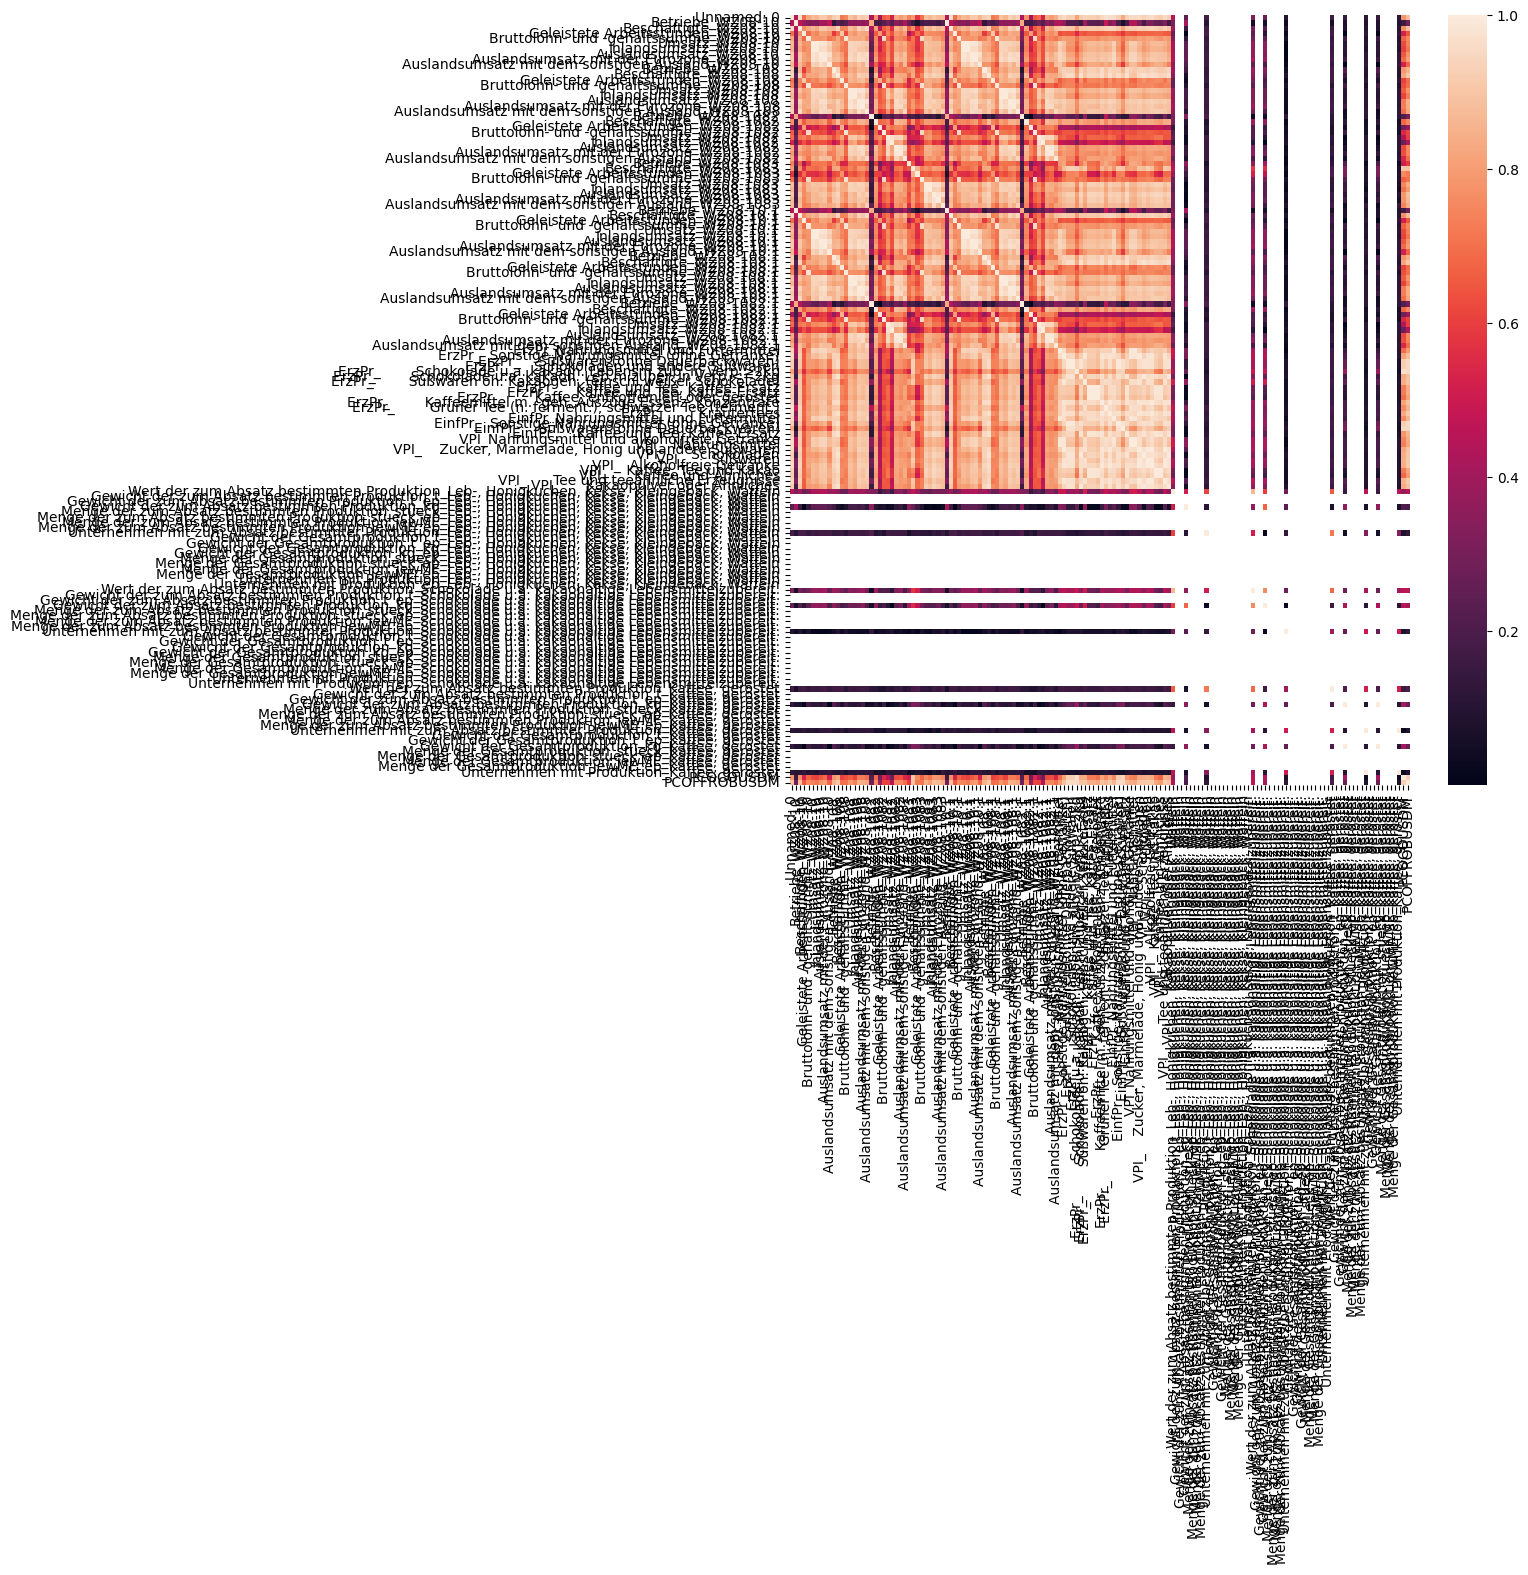

In [16]:
corr = df.loc[:,columns_numeric].corr()
fig_heatmap, ax_heatmap = plt.subplots(nrows=1, ncols=1, figsize=(10,10));
sns.heatmap(corr.abs(), xticklabels=True, yticklabels=True, ax=ax_heatmap)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5));
ax.plot( 
    df.index.values,  
    df['Betriebe_WZ08-10']
)
ax.plot( 
    df.index.values,  
    df['Betriebe_WZ08-108']
)
ax.plot( 
    df.index.values,  
    df['Betriebe_WZ08-1082']
)